In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Distinguir unidad muestral, variables o campos de la muestra y cantidad de registros.
2. ¿Qué tipo de datos corresponde a cada variable?
3. ¿Qué variables crees te ayudarían a estimar la probabilidad de supervivencia de cada pasajero?
4. Construir una tabla de frecuencias del tipo de pasaje (Pclass) y por otra parte, del puerto donde embarcó (Embarked)
5. Dibujar dos graficos de torta a partir de las tablas del inciso anterior.
6. Construir un gráfico de barras corespondiente al campo Sex, para ver cómo se distribuyen los pasajeros según el sexo.
7. Crear una tabla de frecuencias y un histograma para la variable Edad (Age). ¿Es posible decir algo respecto a la distribución de las edades dentro del barco?
8. Calcular la Media, Moda y Mediana de la varible precio del ticket (Fare) y también de la variable Edad (Age).
9. Obtener los cuartiles de la distribución de la variable Fare, o bien precio del ticket.
10. ¿Cuál es el rango de edades y de precio de ticket de los pasajeros?
11. Obtener el desvío estandar de las variables cuyo rango se obtuvo en el inciso anterior. 
12. Obtener el rango y el desvío de las variables SibSp y Parch, que indican la cantidad de hermanos/padres y de hijos/pareja.
13. ¿Podria decir cuáles son los campos que mayor y menor variabilidad presentan?

In [166]:
df = pd.read_csv('../Data-RollingCode/Data/Modulo_1/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Distinguir unidad muestral, variables o campos de la muestra y cantidad de registros.

**Unidad Muestral**: Individuos tripulantes del Titanic identificado por una fila de la muestra.

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Campos de la muestra**: Los cambios de la muestra son _'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin' y 'Embarked'_

In [8]:
df.shape

(891, 12)

**Cantidad de registros**: La muestra esta conformada por 891 registros.

## 2. ¿Qué tipo de datos corresponde a cada variable?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [165]:
for col in ['Survived', 'Pclass', 'Sex', 'Cabin', 'Embarked']:
    df[col] = df[col].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(7), float64(2), int64(1), object(2)
memory usage: 39.3+ KB


In [14]:
df['Pclass'].unique()

[3, 1, 2]
Categories (3, int64): [3, 1, 2]

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,2,0,549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pclass,891,3,3,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,891,891,"Smart, Mr. John Montgomery",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,7,0,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,891,7,0,678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket,891,681,CA. 2343,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


Las variables **'Survived'** y **'Sex'** aparentan ser variables cualitativas dicotómicas. Mientras que las columnas **'PassengerId'**, **'Name'**, **'SibSp'**,**'Parch'**, **'Ticket**', **'Cabin'** y **'Embarked'** aparentan ser variables categoricas nominales. Mientras que la variable 'Pclass' aparenta ser una variable cualitativa categórica ordinal.


Las columnas **'Age'** y **'Fare'** son variables cuantitativas, discreta y continua respectivamente. 

## 3. ¿Qué variables crees te ayudarían a estimar la probabilidad de supervivencia de cada pasajero?

In [19]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


Algunas variables como **'PassengerId'** o **'Name'** no creo que nos brinden mucha información para estimar la probabilidad de supervivencia. Sin embargo, posiblemente **'Pclass'**, **'Sex'** (_Mujeres y niños primero decian..._), **'Age'**, **'Fare'** y **'Embarked'** sean relevantes para definir la "suerte" de un pasajero. Sin embargo no desestimaria **'SibSp'**, **'Cabin'** y **'Parch'** sin conocer el significado de las variables.

## 4. Construir una tabla de frecuencias del tipo de pasaje (Pclass) y por otra parte, del puerto donde embarcó (Embarked)

In [29]:
 pd.crosstab(index=df["Pclass"], 
             columns="count",
             colnames=['Frecuencia "Pclass"']) .T

Pclass,1,2,3
"Frecuencia ""Pclass""",,,
count,216,184,491


In [49]:
pd.crosstab(index=df["Embarked"], 
             columns="count",
             colnames=['Frecuencia "Embarked"']) .T

Embarked,C,Q,S
"Frecuencia ""Embarked""",,,
count,168,77,644


## 5. Dibujar dos graficos de torta a partir de las tablas del inciso anterior.

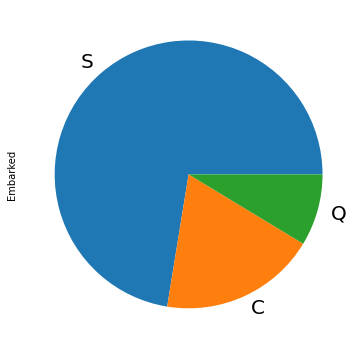

In [71]:
df['Embarked'].value_counts().plot(kind='pie', subplots=True, figsize=(6,10), fontsize=20);

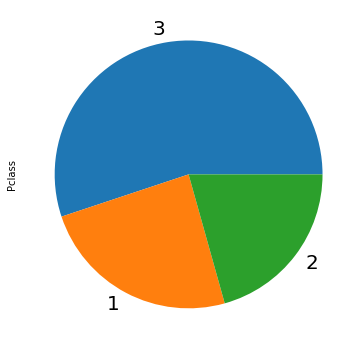

In [69]:
df['Pclass'].value_counts().plot(kind='pie', subplots=True, figsize=(6,10), fontsize=20);

## 6. Construir un gráfico de barras corespondiente al campo Sex, para ver cómo se distribuyen los pasajeros según el sexo.

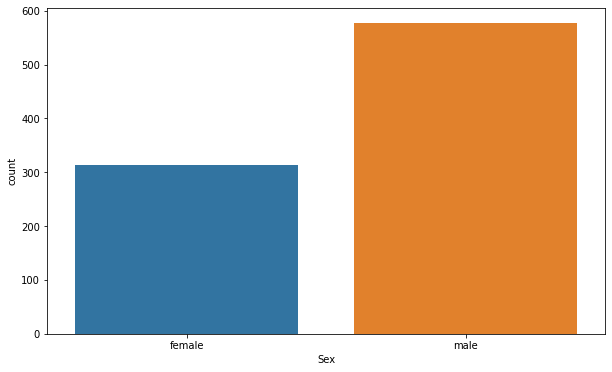

In [80]:
fig, ax = plt.subplots(1, figsize=(10,6))
sns.countplot(x='Sex', data=df, ax=ax);

## 7. Crear una tabla de frecuencias y un histograma para la variable Edad (Age). ¿Es posible decir algo respecto a la distribución de las edades dentro del barco?

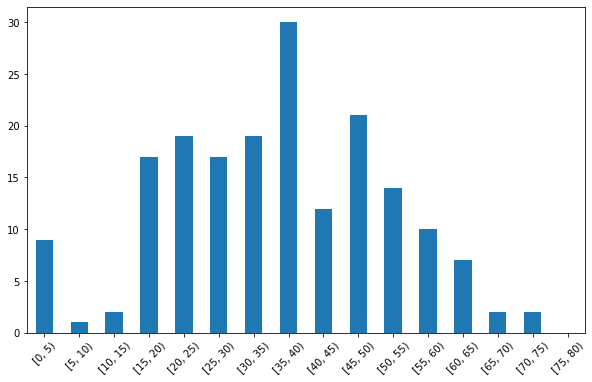

In [132]:
df_age = df.dropna()["Age"]

graf, _ = pd.cut(df_age, bins=list(range(0,85,5)), include_lowest=True, right=False, retbins=True)
graf.value_counts(sort=False).plot.bar(figsize=(10,6), rot=45);

In [125]:
graf.value_counts(sort=False).to_frame().T

,"[0, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 70)","[70, 75)","[75, 80)"
Age,9,1,2,17,19,17,19,30,12,21,14,10,7,2,2,0


## 8. Calcular la Media, Moda y Mediana de la varible precio del ticket (Fare) y también de la variable Edad (Age).

In [154]:
print(f"Media de Age: {df['Age'].mean().round(3)}")
print(f"Mediana de Age: {df['Age'].median().round(3)}")
print(f"Moda de Age: {(df['Age'].mode(dropna=True).values[0].round(3))}");

Media de Age: 29.699
Mediana de Age: 28.0
Moda de Age: 24.0


In [156]:
print(f"Media de Fare: {df['Fare'].mean().round(3)}")
print(f"Mediana de Fare: {df['Fare'].median().round(3)}")
print(f"Moda de Fare: {df['Fare'].mode(dropna=True).values[0].round(3)}")

Media de Fare: 32.204
Mediana de Fare: 14.454
Moda de Fare: 8.05


## 9. Obtener los cuartiles de la distribución de la variable Fare, o bien precio del ticket.

In [160]:
df['Fare'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## 10. ¿Cuál es el rango de edades y de precio de ticket de los pasajeros? 
## 11. Obtener el desvío estandar de las variables cuyo rango se obtuvo en el inciso anterior. 

In [162]:
df[['Fare', 'Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000


## 12. Obtener el rango y el desvío de las variables SibSp y Parch, que indican la cantidad de hermanos/padres y de hijos/pareja.

In [167]:
df[['SibSp', 'Parch']].describe().T

,count,mean,std,min,25%,50%,75%,max
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0


## 13. ¿Podria decir cuáles son los campos que mayor y menor variabilidad presentan?

In [168]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
